Determine the wave speed and size for various values of the threshold and kmin

In [1]:
import spatialfunctions as sf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
plt.rcParams['font.family'] = 'serif'

# Make plot colors and things to make it easier to be consistent
cmap = plt.cm.get_cmap('Greens').reversed()
c0 = 'k'

# Figsize consistent
figsize = (3,3)

/var/folders/l1/prbyqvgx4mg745chvp4d8x3r0000gn/T/ipykernel_68125/2802165501.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens').reversed()


In [3]:
# Set params
s = 0.99
N = 60
c = 1300
al= 0.001

# Use a range of thresholds
plist = np.arange(100,625,25)
plen = len(plist)

# Set up grid to be large enough given the dispersal kernel
xrexp = 19; dx=16;
xr = np.arange(-2**xrexp,2**xrexp+dx,step=dx)

# kmin and kmax
kminlist = np.logspace(-3,0,num=4)
kmaxlist = np.logspace( 1,4,num=4)
# Make appropriate cmap
ck = cmap
ck = ck(np.linspace(0, 1, len(kminlist)+3))

In [7]:
# Simulate for this many steps
nt = 200

# Save metrics
metrics_kmin = np.zeros([3,len(kminlist),plen])
metrics_kmax = np.zeros([3,len(kmaxlist),plen])

for j,kk in enumerate(kminlist):
    for i,pp in enumerate(plist):
        # Simple progress bar
        clear_output(wait=True)
        print(i+1,"/",plen, " k_min",j+1, "/4")
        # Get metrics speed[i],period[i],size[i]
        metrics_kmin.T[i,j] = sf.get_outbreak_metrics(pp,c,s,N,al,xr,xrexp,dx,nt,kmin=kk)

for j,kk in enumerate(kmaxlist):
    for i,pp in enumerate(plist):
        # Simple progress bar
        clear_output(wait=True)
        print(i+1,"/",plen, " k_max",j+1, "/4")
        # Get metrics speed[i],period[i],size[i]
        metrics_kmax.T[i,j] = sf.get_outbreak_metrics(pp,c,s,N,al,xr,xrexp,dx,nt,kmax=kk)

9 / 21  k_min 1 /4


KeyboardInterrupt: 

# Individual figures

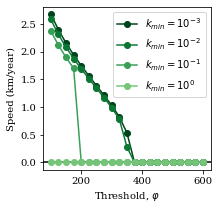

In [16]:
# Plot speeds
plt.figure(figsize=figsize)
for j,kk in enumerate(kminlist):
    plt.plot(plist,metrics_kmin[0,j]/1000,'o-',c=ck[j],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
plt.axhline(0,c=c0,zorder=-99)
plt.legend()
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Speed (km/year)')
plt.savefig('figures/speed_varykmin.pdf',bbox_inches='tight')

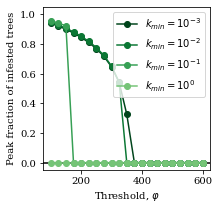

In [17]:
# Plot sizes
plt.figure(figsize=figsize)
for j,kk in enumerate(kminlist):
    plt.plot(plist,metrics_kmin[2,j],'o-',c=ck[j],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
plt.axhline(0,c=c0,zorder=-99)
ydefault = plt.gca().get_ylim()
plt.ylim(ydefault[0],1.05)
plt.legend()
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Peak fraction of infested trees')
plt.savefig('figures/size_varykmin.pdf',bbox_inches='tight')

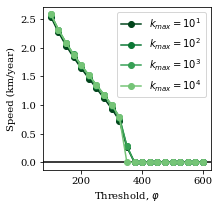

In [18]:
# Plot speeds
plt.figure(figsize=figsize)
for j,kk in enumerate(kmaxlist):
    plt.plot(plist,metrics_kmax[0,j]/1000,'o-',c=ck[j],label=r'$k_{{max}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
plt.axhline(0,c=c0,zorder=-99)
plt.legend()
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Speed (km/year)')
plt.savefig('figures/speed_varykmax.pdf',bbox_inches='tight')

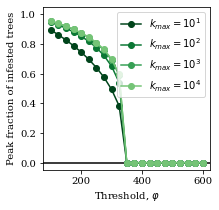

In [19]:
# Plot sizes
plt.figure(figsize=figsize)
for j,kk in enumerate(kmaxlist):
    plt.plot(plist,metrics_kmax[2,j],'o-',c=ck[j],label=r'$k_{{max}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
plt.axhline(0,c=c0,zorder=-99)
ydefault = plt.gca().get_ylim()
plt.ylim(ydefault[0],1.05)
plt.legend()
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Peak fraction of infested trees')
plt.savefig('figures/size_varykmax.pdf',bbox_inches='tight')

# Combined figures

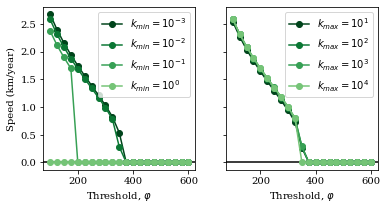

In [20]:
# Plot speeds
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2,figsize[0]),sharey=True)
for j,kk in enumerate(kminlist):
    axs[0].plot(plist,metrics_kmin[0,j]/1000,'o-',c=ck[j],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
for j,kk in enumerate(kmaxlist):
    axs[1].plot(plist,metrics_kmax[0,j]/1000,'o-',c=ck[j],label=r'$k_{{max}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
for ax in axs:
    ax.axhline(0,c=c0,zorder=-99)
    ax.set_xlabel(r'Threshold, $\varphi$')
    ax.legend()
axs[0].set_ylabel('Speed (km/year)')
fig.savefig('figures/speed_varykm.pdf',bbox_inches='tight')

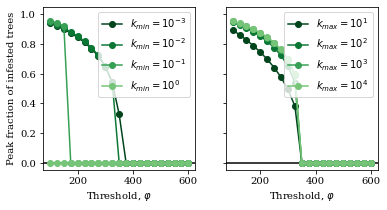

In [21]:
# Plot speeds
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2,figsize[0]),sharey=True)
for j,kk in enumerate(kminlist):
    axs[0].plot(plist,metrics_kmin[2,j],'o-',c=ck[j],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
for j,kk in enumerate(kmaxlist):
    axs[1].plot(plist,metrics_kmax[2,j],'o-',c=ck[j],label=r'$k_{{max}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
for ax in axs:
    ax.axhline(0,c=c0,zorder=-99)
    ax.set_xlabel(r'Threshold, $\varphi$')
    ax.legend(loc='upper right')
ydefault = fig.gca().get_ylim()
axs[0].set_ylim(ydefault[0],1.05)
axs[0].set_ylabel('Peak fraction of infested trees')
fig.savefig('figures/size_varykm.pdf',bbox_inches='tight')

# Vary kmin by density
As in the optimized F section, this considers what happens if we vary k_min by minimizing until we reach the end of epidemic densities.

In [6]:
# Set up mfixlist according to Boone et al. epidemic data
mfixlist = plist*20/1225
# Now get metrics
metrics_kmin_alt = np.zeros([3,plen])
for j,(pp,mf) in enumerate(zip(plist,mfixlist)):
    metrics_kmin_alt.T[j] = sf.get_outbreak_metrics(pp,c,s,N,al,xr,xrexp,dx,nt,kmin=1e-4,mfix=mf)

/Users/micbru/Documents/Research/2023MPBSpatial/Code/spatialfunctions.py:294: RuntimeWarning: Mean of empty slice.
  flag = np.all(periods == periods.mean())
/opt/homebrew/Caskroom/miniforge/base/envs/pymc_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/Caskroom/miniforge/base/envs/pymc_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/micbru/Documents/Research/2023MPBSpatial/Code/spatialfunctions.py:299: RuntimeWarning: invalid value encountered in cast
  return np.median(periods).astype(int)


Text(0, 0.5, 'Speed (km/year)')

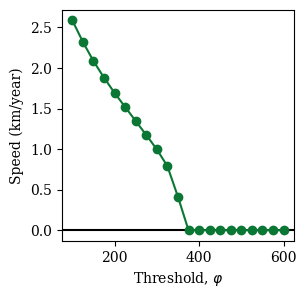

In [9]:
# Plot speeds
plt.figure(figsize=figsize)
plt.plot(plist,metrics_kmin_alt[0]/1000,'o-',c=ck[1])
plt.axhline(0,c=c0,zorder=-99)
#plt.legend()
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Speed (km/year)')

Text(0, 0.5, 'Peak fraction of infested trees')

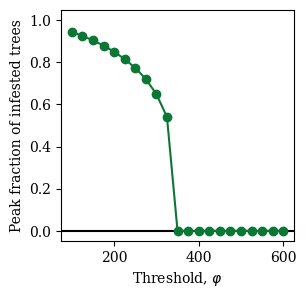

In [10]:
# Plot sizes
plt.figure(figsize=figsize)
plt.plot(plist,metrics_kmin_alt[2],'o-',c=ck[1])
plt.axhline(0,c=c0,zorder=-99)
ydefault = plt.gca().get_ylim()
plt.ylim(ydefault[0],1.05)
#plt.legend()
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Peak fraction of infested trees')